In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
task = "vqa"
result_dir = f"results/ablation_top_neurons/{task}/{task}_git_1vd125_s1_e29_nall/"
result_dict = {}
for file in os.listdir(result_dir):
        subtask = " ".join(file.split("_")[:-3])
        with open(result_dir + file, "rb") as f:
            results = pickle.load(f)
        result_dict[subtask] = results

In [3]:
final = {}
subtasks = set()
for mode, dict in result_dict.items():
    subtasks.add(mode)
    for k, res in dict.items():
        if mode in k.replace(" ", ""):
            final[k] = res

In [4]:
for task, dict in final.items():
    print(f"{task} - {dict['acc_ablated'].item()}")

action and state_noimg - 0.4825174808502197
action and state - 0.4825174808502197
color identification_noimg - 0.6333760023117065
color identification - 0.6333760023117065
general queries and miscellaneous_noimg - 0.5163511037826538
general queries and miscellaneous - 0.5163511037826538
identification and classification_noimg - 0.5336397886276245
identification and classification - 0.5336397886276245
person and object identification_noimg - 0.506546139717102
person and object identification - 0.506546139717102
quantity and counting_noimg - 0.8888888955116272
quantity and counting - 0.8888888955116272
reason and purpose_noimg - 0.35999998450279236
reason and purpose - 0.35999998450279236
spatial and positional information_noimg - 0.48163843154907227
spatial and positional information - 0.48163843154907227
temporal information_noimg - 0.5227273106575012
temporal information - 0.5227273106575012
verification and existence_noimg - 0.4744585156440735
verification and existence - 0.474458515

In [5]:
matrix = {}
for k, v in final.items():
    clean = v["acc_clean"].item()
    noimg_effect = v["acc_ablated_noimg"].item()
    regular_effect = v["acc_ablated"].item()
    matrix[k] = {"noimg": noimg_effect*100, "withimg": regular_effect*100, "clean":clean*100}

df = pd.DataFrame.from_dict(matrix, orient='index')
df

,noimg,withimg,clean
action and state_noimg,50.699300,48.251748,99.650347
action and state,50.699300,48.251748,100.000000
color identification_noimg,57.533079,63.337600,43.576613
color identification,57.533079,63.337600,44.472900
general queries and miscellaneous_noimg,50.731498,51.635110,72.590363
general queries and miscellaneous,50.731498,51.635110,75.602406
identification and classification_noimg,50.355202,53.363979,80.902630
identification and classification,50.355202,53.363979,83.618885
person and object identification_noimg,49.844143,50.654614,92.113471
person and object identification,49.844143,50.654614,91.895264


In [6]:
vqa_tasks = {"person and object identification": "Person & Object Identification",
"general queries and miscellaneous": "Other",
"action and state": "Action & State",
"color identification": "Color Identification",
"verification and existence": "Verification & Existence",
"identification and classification": "Identification & Classification",
"temporal information": "Temporal Information",
"spatial and positional information": "Spatial & Positional Information",
"reason and purpose": "Reason & Purpose",
"quantity and counting": "Quantity & Counting"}

### Plot Ablation Results for all Tasks

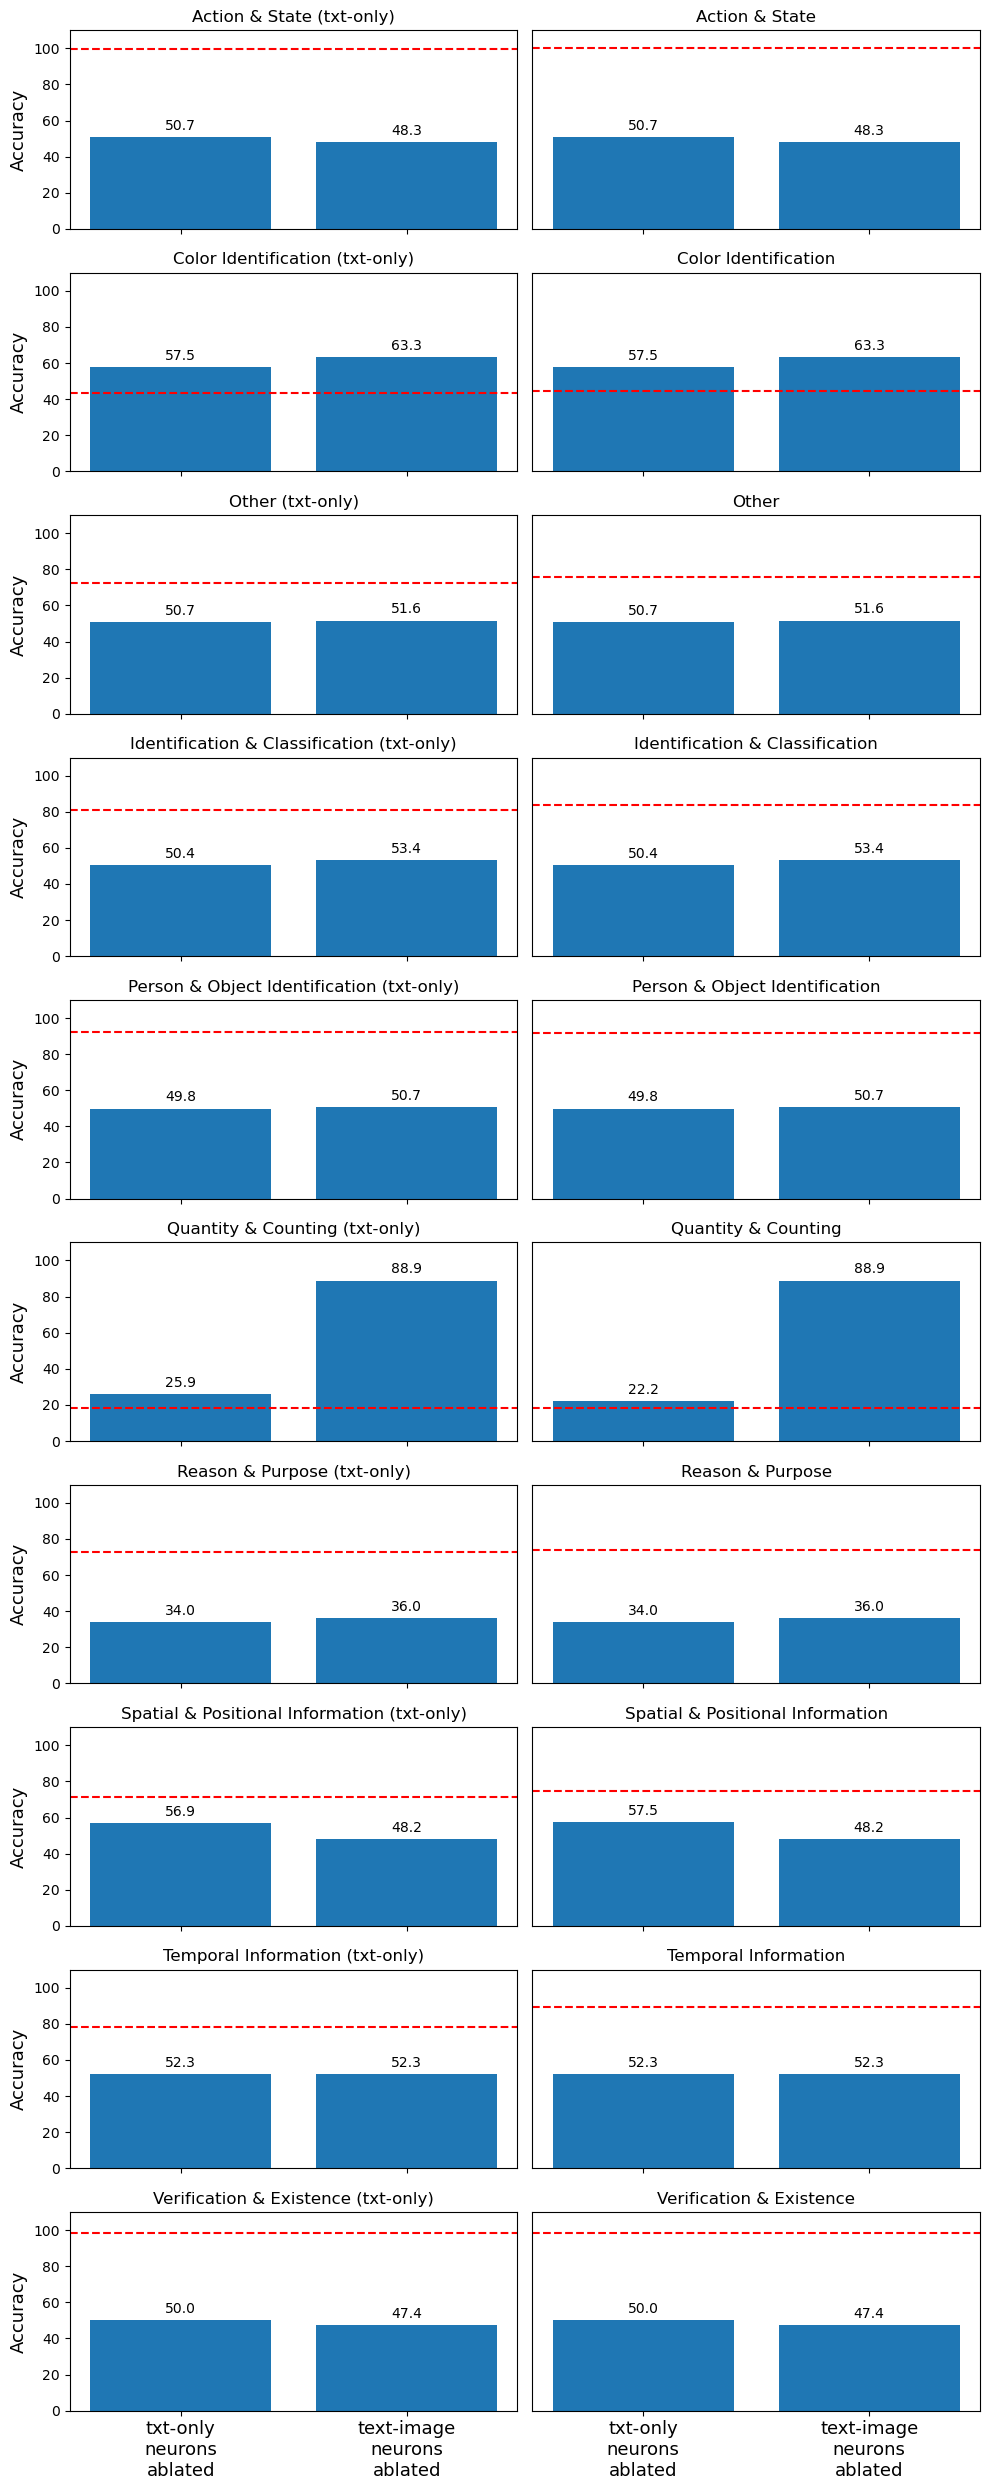

In [7]:
# Number of subplots
num_plots = len(matrix.keys())
cols = 2
rows = (num_plots + 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 25))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each outer dictionary
for i, (key, inner_dict) in enumerate(matrix.items()):
    clean = inner_dict["clean"]
    res = {}
    for k,v in inner_dict.items():
        if k!="clean":
            name = "txt-only\nneurons\nablated" if k == "noimg" else "text-image\nneurons\nablated"
            res[name] = v
    subtask_name = vqa_tasks[key.replace("_noimg","")]
    bars = axes[i].bar(list(res.keys()), [v for v in res.values()], color="tab:blue")
    axes[i].axhline(clean, color="r",linestyle="--")
    if "_noimg" in key:
        title = f"{subtask_name} (txt-only)"
    else:
        title = subtask_name
    axes[i].set_title(title)
    axes[i].tick_params(axis='x')
    axes[i].set_ylabel("Accuracy", fontsize=14)

    for bar in bars:
        height = bar.get_height()
        axes[i].annotate(f'{height:.1f}',  # Format to 2 decimal places
                         xy=(bar.get_x() + bar.get_width() / 2, height),  # X and Y location
                         xytext=(0, 3),  # Offset above bar
                         textcoords="offset points",  # Coordinate system
                         ha='center', va='bottom')  # Alignment
        
    axes[i].set_ylim([0, 110])

    # Show y-labels only on the left column (even indices)
    if i % cols == 0:
        axes[i].set_ylabel("Accuracy", fontsize=13)
    else:
        axes[i].set_ylabel('')  # Hide y-labels for the right column
        axes[i].tick_params(axis='y', which='both', left=False, labelsize=14)  # Hide y-ticks for the right column
        axes[i].set_yticklabels([])

    # Show x-labels only on the bottom row
    if i >= (rows - 1) * cols:
        axes[i].tick_params(axis='x', labelrotation=0, labelsize=13)  # Rotate x-axis labels if needed
    else:
        axes[i].tick_params(labelbottom=False)  # Hide x-axis labels for other rows

# Hide any extra axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

#fig.text(0.27, 1.001, 'Subtasks (txt-only) ', ha='center', fontsize=13)
#fig.text(0.77, 1.001, 'Subtasks', ha='center', fontsize=13)    

plt.tight_layout()
plt.show()

### Plot All Tasks (with Vision)

In [8]:
# only use tasks with vision

vision_matrix = {k:v for k,v in matrix.items() if "_noimg" not in k}

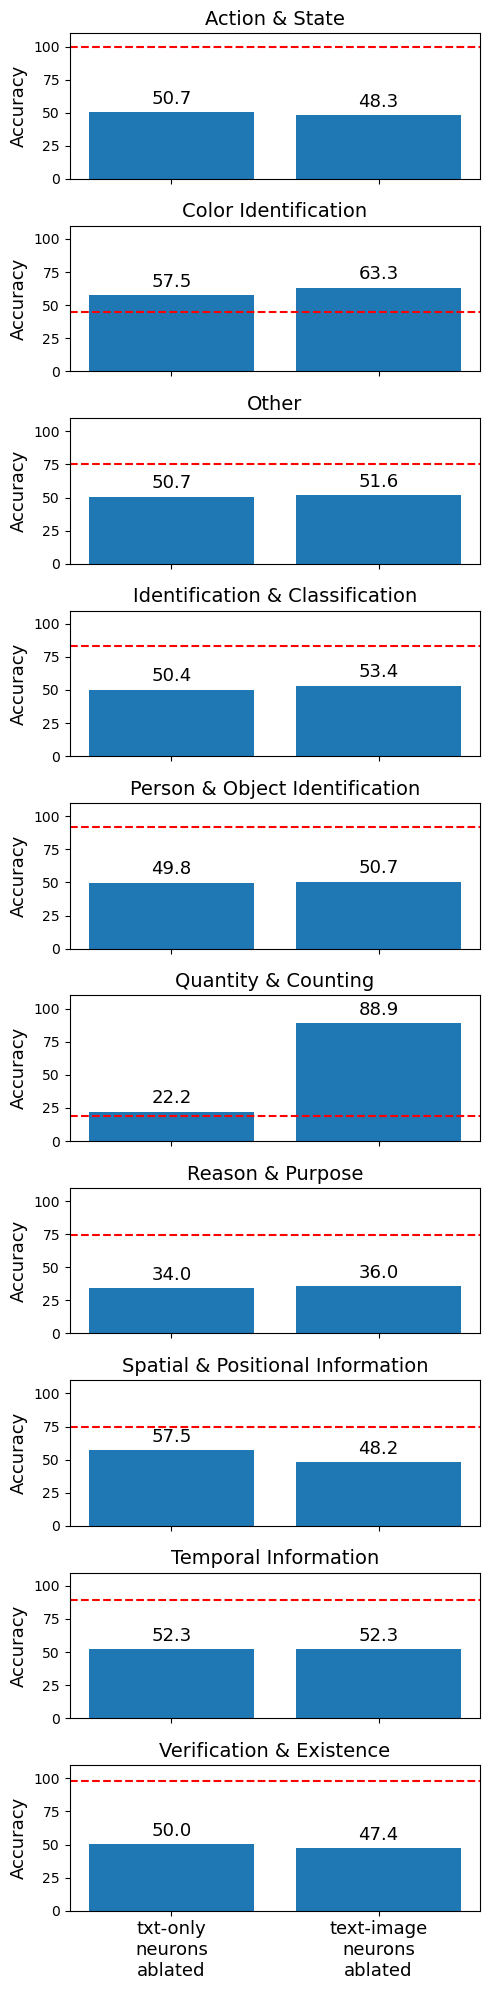

In [9]:
# Number of subplots
num_plots = len(vision_matrix.keys())
cols = 1
rows = 10

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5, 20))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each outer dictionary
for i, (key, inner_dict) in enumerate(vision_matrix.items()):
    clean = inner_dict["clean"]
    res = {}
    for k,v in inner_dict.items():
        if k!="clean":
            name = "txt-only\nneurons\nablated" if k == "noimg" else "text-image\nneurons\nablated"
            res[name] = v
    subtask_name = vqa_tasks[key.replace("_noimg","")]
    bars = axes[i].bar(list(res.keys()), [v for v in res.values()], color="tab:blue")
    axes[i].axhline(clean, color="r",linestyle="--")
    if "_noimg" in key:
        title = f"{subtask_name} (txt-only)"
    else:
        title = subtask_name
    axes[i].set_title(title, fontsize=14)
    axes[i].tick_params(axis='x')
    axes[i].set_ylabel("Accuracy")

    for bar in bars:
        height = bar.get_height()
        axes[i].annotate(f'{height:.1f}',  # Format to 2 decimal places
                         xy=(bar.get_x() + bar.get_width() / 2, height),  # X and Y location
                         xytext=(0, 3),  # Offset above bar
                         textcoords="offset points",  # Coordinate system
                         ha='center', va='bottom', fontsize=13)  # Alignment
        
    axes[i].set_ylim([0, 110])

    # Show y-labels only on the left column (even indices)
    if i % cols == 0:
        axes[i].set_ylabel("Accuracy", fontsize=13)
    else:
        axes[i].set_ylabel('')  # Hide y-labels for the right column
        axes[i].tick_params(axis='y', which='both', left=False, labelsize=14)  # Hide y-ticks for the right column
        axes[i].set_yticklabels([])

    # Show x-labels only on the bottom row
    if i >= (rows - 1) * cols:
        axes[i].tick_params(axis='x', labelrotation=0, labelsize=13)  # Rotate x-axis labels if needed
    else:
        axes[i].tick_params(labelbottom=False)  # Hide x-axis labels for other rows

# Hide any extra axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

### Plot Subset of Tasks

In [10]:
# only use subset of tasks

subset = ["Identification & Classification","Temporal Information","Spatial & Positional Information","Quantity & Counting"]
subset_matrix = {k: v for k,v in matrix.items() if vqa_tasks[k.replace("_noimg","")] in subset}

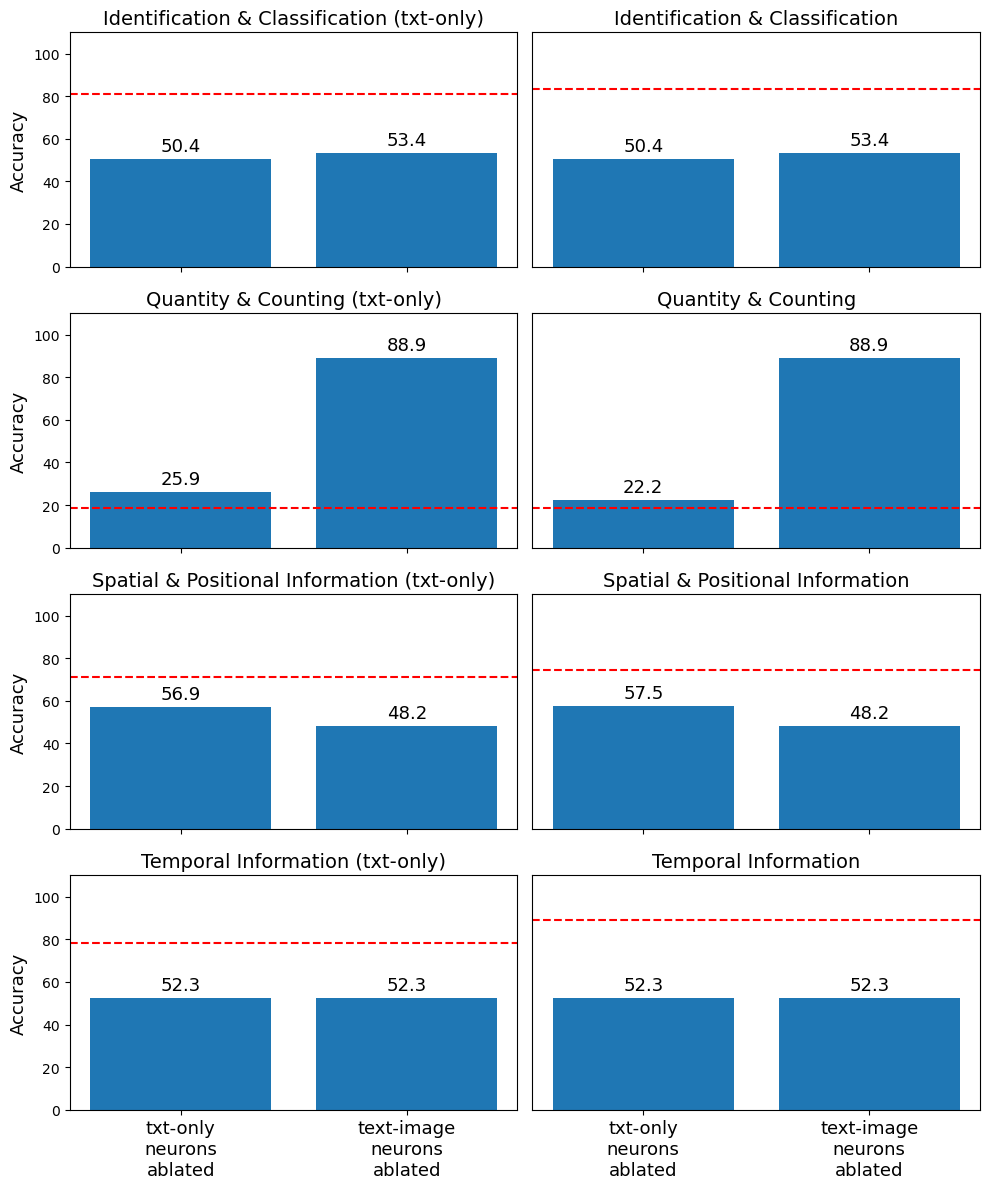

In [11]:
# Number of subplots
num_plots = len(subset_matrix.keys())
cols = 2
rows = (num_plots + 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each outer dictionary
for i, (key, inner_dict) in enumerate(subset_matrix.items()):
    clean = inner_dict["clean"]
    res = {}
    for k,v in inner_dict.items():
        if k!="clean":
            name = "txt-only\nneurons\nablated" if k == "noimg" else "text-image\nneurons\nablated"
            res[name] = v
    subtask_name = vqa_tasks[key.replace("_noimg","")]
    bars = axes[i].bar(list(res.keys()), [v for v in res.values()], color="tab:blue")
    axes[i].axhline(clean, color="r",linestyle="--")
    if "_noimg" in key:
        title = f"{subtask_name} (txt-only)"
    else:
        title = subtask_name
    axes[i].set_title(title, fontsize=14)
    axes[i].tick_params(axis='x')
    axes[i].set_ylabel("Accuracy")

    for bar in bars:
        height = bar.get_height()
        axes[i].annotate(f'{height:.1f}',  # Format to 2 decimal places
                         xy=(bar.get_x() + bar.get_width() / 2, height),  # X and Y location
                         xytext=(0, 3),  # Offset above bar
                         textcoords="offset points",  # Coordinate system
                         ha='center', va='bottom', fontsize=13)  # Alignment
        
    axes[i].set_ylim([0, 110])

    # Show y-labels only on the left column (even indices)
    if i % cols == 0:
        axes[i].set_ylabel("Accuracy", fontsize=13)
    else:
        axes[i].set_ylabel('')  # Hide y-labels for the right column
        axes[i].tick_params(axis='y', which='both', left=False, labelsize=14)  # Hide y-ticks for the right column
        axes[i].set_yticklabels([])

    # Show x-labels only on the bottom row
    if i >= (rows - 1) * cols:
        axes[i].tick_params(axis='x', labelrotation=0, labelsize=13)  # Rotate x-axis labels if needed
    else:
        axes[i].tick_params(labelbottom=False)  # Hide x-axis labels for other rows

# Hide any extra axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

### Plot Subset of Tasks (with Vision)

In [12]:
# only use subset of tasks and only their variants with vision

subset_vision_matrix = {k: v for k,v in vision_matrix.items() if vqa_tasks[k.replace("_noimg","")] in subset}

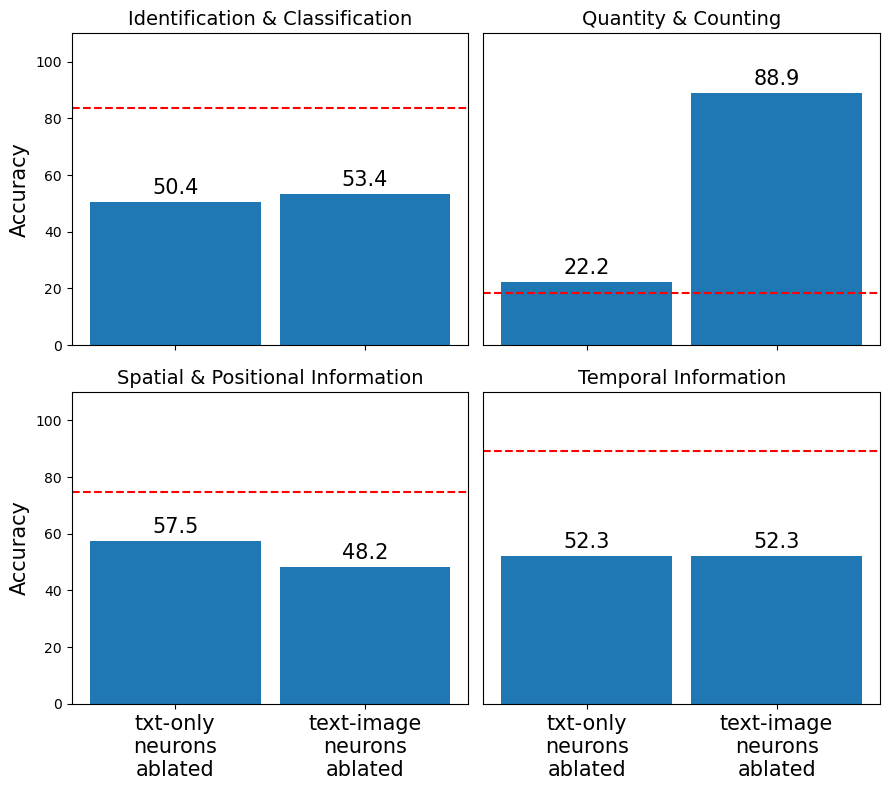

In [13]:
# Number of subplots
num_plots = len(subset_vision_matrix.keys())
cols = 2
rows = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(9, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each outer dictionary
for i, (key, inner_dict) in enumerate(subset_vision_matrix.items()):
    clean = inner_dict["clean"]
    res = {}
    for k,v in inner_dict.items():
        if k!="clean":
            name = "txt-only\nneurons\nablated" if k == "noimg" else "text-image\nneurons\nablated"
            res[name] = v
    subtask_name = vqa_tasks[key.replace("_noimg","")]
    bar_positions = range(len(res.keys()))
    bars = axes[i].bar(list(res.keys()), [v for v in res.values()], color="tab:blue",width=0.9)
    axes[i].axhline(clean, color="r",linestyle="--")
    if "_noimg" in key:
        title = f"{subtask_name} (txt-only)"
    else:
        title = subtask_name
    axes[i].set_title(title, fontsize=14)
    axes[i].tick_params(axis='x')
    axes[i].set_ylabel("Accuracy")

    for bar in bars:
        height = bar.get_height()
        axes[i].annotate(f'{height:.1f}',  # Format to 2 decimal places
                         xy=(bar.get_x() + bar.get_width() / 2, height),  # X and Y location
                         xytext=(0, 3),  # Offset above bar
                         textcoords="offset points",  # Coordinate system
                         ha='center', va='bottom', fontsize=15)  # Alignment
        
    axes[i].set_ylim([0, 110])

    # Show y-labels only on the left column (even indices)
    if i % cols == 0:
        axes[i].set_ylabel("Accuracy", fontsize=15)
    else:
        axes[i].set_ylabel('')  # Hide y-labels for the right column
        axes[i].tick_params(axis='y', which='both', left=False, labelsize=15)  # Hide y-ticks for the right column
        axes[i].set_yticklabels([])

    # Show x-labels only on the bottom row
    if i >= (rows - 1) * cols:
        axes[i].tick_params(axis='x', labelrotation=0, labelsize=15)  # Rotate x-axis labels if needed
    else:
        axes[i].tick_params(labelbottom=False)  # Hide x-axis labels for other rows

# Hide any extra axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
 

plt.tight_layout()
plt.show()